In [70]:
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
#Read rewards from files
e = pd.read_csv("errors.csv", sep= ',')

errD_fake = e.iloc[:,0]
errD_real = e.iloc[:,1]
errG = e.iloc[:,2]
errDstar = e.iloc[:,3]


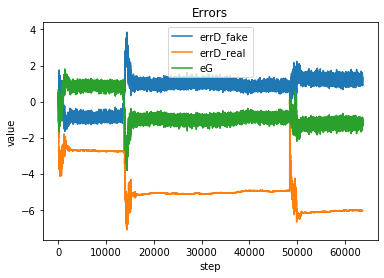

In [72]:
%matplotlib inline 
import matplotlib.pyplot as plt

#Ploting Errors
plt.plot(errD_fake, label='errD_fake')
plt.plot(errD_real, label='errD_real')
plt.plot(errG, label='eG')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('step')
plt.legend()
plt.title('Errors')
plt.savefig('errors.png')

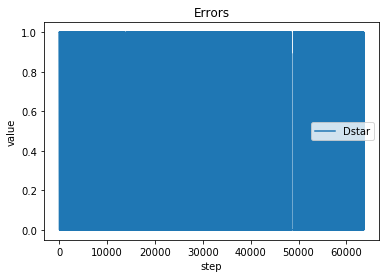

In [73]:
#Ploting Errors
plt.plot(errDstar, label='Dstar')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('step')
plt.legend()
plt.title('Errors')
plt.savefig('errors.png')

In [74]:
#Read classifier stats from files
p = pd.read_csv("performance.csv", sep= ',')
testc_labeled = p.iloc[:,0]
train_loss = p.iloc[:,1]
trainc_labeled = p.iloc[:,2]
trainlib_size = p.iloc[:,3]
p.describe()

,testc_labeled,train_loss,trainc_labeled,train_lib_size
count,3.000000e+00,585.000000,585.000000,585.000000
mean,2.000000e-01,0.003596,0.999772,97.128205
std,3.399350e-17,0.046363,0.003371,56.556969
min,2.000000e-01,0.000000,0.933333,0.000000
25%,2.000000e-01,0.000000,1.000000,48.000000
50%,2.000000e-01,0.000000,1.000000,97.000000
75%,2.000000e-01,0.000000,1.000000,146.000000
max,2.000000e-01,0.908337,1.000000,199.000000


Text(0.5, 1.0, 'Classification Performance')

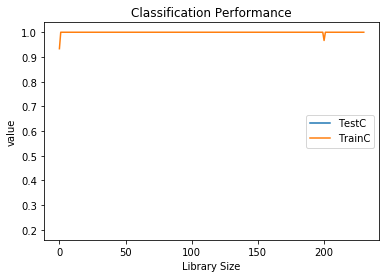

In [69]:
%matplotlib inline 
import matplotlib.pyplot as plt

#Ploting Errors
plt.plot(testc_labeled, label='TestC')
plt.plot(trainc_labeled, label='TrainC')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('Library Size')
plt.legend()
plt.title('Classification Performance')
#plt.savefig('classifier_perf.png')

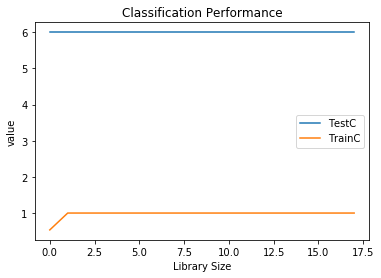

In [44]:
#Read classifier stats from files
p = pd.read_csv("rwg_performance.csv", sep= ',')
p.describe()
testc_labeled = p.iloc[:,0]
train_loss = p.iloc[:,1]
trainc_labeled = p.iloc[:,2]
trainlib_size = p.iloc[:,3]

%matplotlib inline 
import matplotlib.pyplot as plt

#Ploting Errors
plt.plot(testc_labeled, label='TestC')
plt.plot(trainc_labeled, label='TrainC')
_ = plt.ylim()
plt.ylabel('value')
plt.xlabel('Library Size')
plt.legend()
plt.title('Classification Performance')
plt.savefig('classifier_generative_style_random.png')

In [46]:
#Read classifier stats from files
p = pd.read_csv("random_performance.csv", sep= ',')
p.describe()
# testc_labeled = p.iloc[:,0]
# train_loss = p.iloc[:,1]
# trainc_labeled = p.iloc[:,2]
# trainlib_size = p.iloc[:,3]

# %matplotlib inline 
# import matplotlib.pyplot as plt

# #Ploting Errors
# plt.plot(testc_labeled, label='TestC')
# plt.plot(trainc_labeled, label='TrainC')
# _ = plt.ylim()
# plt.ylabel('value')
# plt.xlabel('Library Size')
# plt.legend()
# plt.title('Classification Performance')
# #plt.savefig('classifier_perf.png')

FileNotFoundError: [Errno 2] No such file or directory: 'random_performance.csv'